# «Мегалайн»: «Смарт» vs «Ультра». 

В этом проекте нам предстоит выяснить, какой из двух представленных тарифов приносит компании больше денег.
У нас есть данные 500 пользователей за 2018 год по звонкам, сообщениям и использованию интернета, а также описание тарифов и некоторые дополнительные данные по пользователям.

*Описание тарифов*  
**Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  
**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  
*«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.*

# ОГЛАВЛЕНИЕ


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Извлечение-данных-и-первичный-анализ" data-toc-modified-id="Извлечение-данных-и-первичный-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Извлечение данных и первичный анализ</a></span><ul class="toc-item"><li><span><a href="#Поищем-ошибки-повнимательнее" data-toc-modified-id="Поищем-ошибки-повнимательнее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поищем ошибки повнимательнее</a></span></li></ul></li><li><span><a href="#Посчитаем-сколько-расходуют-наши-клиенты-и-сколько-нам-это-приносит-денег" data-toc-modified-id="Посчитаем-сколько-расходуют-наши-клиенты-и-сколько-нам-это-приносит-денег-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитаем сколько расходуют наши клиенты и сколько нам это приносит денег</a></span><ul class="toc-item"><li><span><a href="#Начнем-со-звонков" data-toc-modified-id="Начнем-со-звонков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Начнем со звонков</a></span></li><li><span><a href="#Теперь-посчитаем-количество-отправленных-сообщений-по-месяцам." data-toc-modified-id="Теперь-посчитаем-количество-отправленных-сообщений-по-месяцам.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Теперь посчитаем количество отправленных сообщений по месяцам.</a></span></li><li><span><a href="#Теперь-объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Теперь-объем-израсходованного-интернет-трафика-по-месяцам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Теперь объем израсходованного интернет-трафика по месяцам</a></span></li></ul></li><li><span><a href="#Перейдем-к-анализу" data-toc-modified-id="Перейдем-к-анализу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Перейдем к анализу</a></span><ul class="toc-item"><li><span><a href="#Начнем-с-тарифа-Смарт" data-toc-modified-id="Начнем-с-тарифа-Смарт-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Начнем с тарифа Смарт</a></span></li><li><span><a href="#Постичаем-все-то-же-самое-для-тарифа-Ultra" data-toc-modified-id="Постичаем-все-то-же-самое-для-тарифа-Ultra-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Постичаем все то же самое для тарифа Ultra</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Москва-докажет" data-toc-modified-id="Москва-докажет-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Москва докажет</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
import math
pd.options.display.max_columns = None

## Извлечение данных и первичный анализ

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
df_users = pd.read_csv('/datasets/users.csv')

In [7]:
df_tariffs.info()
df_tariffs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
df_users.info()
df_users.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [9]:
df_calls.info()
df_calls.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [10]:
df_messages.info()
df_messages.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [11]:
df_internet.info()
df_internet.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [12]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [13]:
df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


У нас 5 исходных таблицы: два тарифа, 500 уникальных пользователей, и три таблиц с данными по 202 тысячам звонков, 123 тысячам смсок и 149 тысячам интернет сеансов.   
Посмотрим нет ли каких-то явных ошибок и дубликатов в них, а потом займемся объединением.

In [14]:
df_users.duplicated().sum()

0

In [15]:
df_calls.duplicated().sum()

0

In [16]:
df_messages.duplicated().sum()

0

In [17]:
df_internet.duplicated().sum()

0

Глянем, не закрались ли данные по другим тарифам

In [18]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [19]:
#df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

In [20]:
#df_internet.head(3)

Исправим формат столбцов с датами там, где это может нам пригодиться, воспользовавшись автоматическом определением дат при выгрузке. Если данные считаются не правильно, задаим формат вручную.

In [21]:
df_calls = pd.read_csv('/datasets/calls.csv', parse_dates=['call_date'])

In [22]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [23]:
pd.DatetimeIndex(df_calls['call_date']).month

Int64Index([ 7,  8,  6,  9, 12, 11, 10,  8,  9,  8,
            ...
            10, 12, 12, 10, 12, 12, 10, 11, 10, 12],
           dtype='int64', name='call_date', length=202607)

Наш формат даты считывается правильно, сделаем то же для данных по сообщениям и интернету

In [24]:
df_internet = pd.read_csv('/datasets/internet.csv', parse_dates=['session_date'], index_col=0)

In [25]:
df_messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])

In [26]:
#df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [27]:
#df_calls.info()

In [28]:
#df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [29]:
#df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов, давайте сразу это сделаем для удобства последующих расчетов

In [30]:
df_calls['duration'] = np.ceil(df_calls['duration'])

In [31]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

### Поищем ошибки повнимательнее

In [32]:
df_calls.sort_values('call_date') #это я смотрю все ли в 2018 году

,id,call_date,duration,user_id
180968,1453_160,2018-01-01,0.0,1453
181239,1453_431,2018-01-01,20.0,1453
76907,1193_169,2018-01-01,14.0,1193
181903,1453_1095,2018-01-01,6.0,1453
181106,1453_298,2018-01-01,16.0,1453
...,...,...,...,...
51898,1130_186,2018-12-31,15.0,1130
155006,1382_789,2018-12-31,10.0,1382
173182,1427_546,2018-12-31,1.0,1427
30050,1076_342,2018-12-31,1.0,1076


In [33]:
df_calls.groupby('user_id')['duration'].agg(
    ['median', 'min', 'max', 'mean', 'count']).sort_values('max', ascending=False) # здесь смотрю на макс продолчтельность звонка и заодно на другие параметры

,median,min,max,mean,count
user_id,,,,,
1446,6.0,0.0,38.0,6.890566,265
1241,5.0,0.0,38.0,6.718750,256
1099,7.0,0.0,37.0,7.238824,850
1017,6.0,0.0,37.0,7.117647,408
1153,6.0,0.0,36.0,7.021930,228
...,...,...,...,...,...
1424,6.0,0.0,18.0,7.114286,35
1016,5.5,0.0,17.0,6.100000,20
1406,9.0,0.0,17.0,7.435897,39


Как написано у нас в описании задания "длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки". Делать с ними пока ничего не будем, поймем в процессе анализа.

In [34]:
df_messages.sort_values('message_date')

,id,message_date,user_id
35693,1155_82,2018-01-02,1155
112561,1453_586,2018-01-02,1453
112248,1453_273,2018-01-02,1453
36021,1155_410,2018-01-02,1155
13096,1055_62,2018-01-02,1055
...,...,...,...
52443,1231_1064,2018-12-31,1231
14184,1060_21,2018-12-31,1060
31402,1139_37,2018-12-31,1139
89442,1373_454,2018-12-31,1373


In [35]:
df_messages.groupby(['user_id', 'message_date']).count().sort_values('id', ascending=False)

id
user_id message_date    
1485    2018-12-30    59
        2018-12-31    54
        2018-12-29    42
1445    2018-12-29    32
1140    2018-12-31    31
...                   ..
1350    2018-10-23     1
1154    2018-09-21     1
        2018-09-23     1
        2018-09-27     1
1381    2018-01-26     1

[52657 rows x 1 columns]

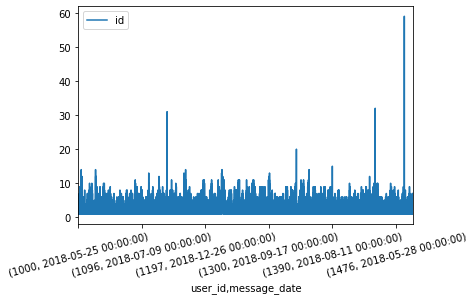

In [36]:
df_messages.groupby(['user_id', 'message_date']).count().plot(rot=15) #для наглядности посмотреть на пики и общее распределение

In [37]:
df_internet.sort_values('session_date')

,id,mb_used,session_date,user_id
135277,1453_498,210.0,2018-01-01,1453
57584,1193_123,0.0,2018-01-01,1193
135081,1453_302,795.0,2018-01-01,1453
45314,1155_501,0.0,2018-01-02,1155
16177,1055_635,106.0,2018-01-02,1055
...,...,...,...,...
16943,1058_119,564.0,2018-12-31,1058
146969,1491_241,328.0,2018-12-31,1491
39896,1141_18,338.0,2018-12-31,1141
90301,1306_35,0.0,2018-12-31,1306


In [38]:
df_internet.groupby(['user_id', 'session_date']).sum().sort_values('mb_used', ascending=False)

mb_used
user_id session_date         
1336    2018-12-31    26607.0
1140    2018-12-31    20068.0
1258    2018-12-31    18718.0
1074    2018-12-31    12200.0
1485    2018-12-30     9878.0
...                       ...
1179    2018-10-29        0.0
        2018-11-09        0.0
        2018-11-28        0.0
        2018-12-03        0.0
1000    2018-05-26        0.0

[70650 rows x 1 columns]

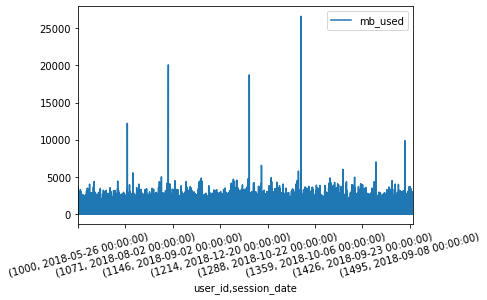

In [39]:
df_internet.groupby(['user_id', 'session_date']).sum().plot(rot=15)

Все данные выглядят вполне реалестично, ошибок я пока не вижу. Взглянули на даты - там все ок, все данные в рамках 2018 года. Пройдясь по максимумам я ничего критичного тоже не заметил, хотя они и довольно редки, все равно кажутся мне реальными - скачать что-то за день на 26 Гб вполне правдоподобно, если целый день смотреть видосики и фильмы (один фильм в высоком разрешении на пару часов порядка 4 Гб, то есть достаточно 12 часов видео для того чтобы набежал такой трафик); отправить за день 59 смсок тоже нормально, если ты влюблен, а твоя возлюбленная не пользуется мессенджерами; разговаривать 38 минут - ну это вот уже как-то маловато для пикового значения выборки, но все равно в рамках разумного... 

Нулевые звонки

In [40]:
df_calls['duration'].value_counts()

0.0     39613
7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
12.0     8448
1.0      8402
13.0     7486
14.0     6554
15.0     5505
16.0     4551
17.0     3671
18.0     2984
19.0     2411
20.0     1806
21.0     1304
22.0      975
23.0      720
24.0      468
25.0      363
26.0      257
27.0      151
28.0      104
29.0       56
30.0       39
31.0       30
32.0       17
33.0       10
35.0        5
34.0        3
38.0        2
36.0        2
37.0        2
Name: duration, dtype: int64

In [41]:
len(df_calls.query('duration == 0')) / len(df_calls)

0.19551644316336553

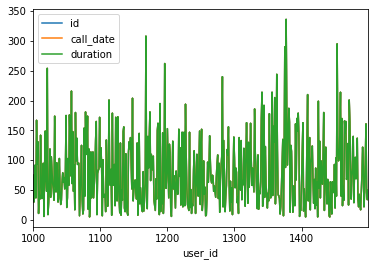

In [42]:
df_calls.query('duration == 0').groupby('user_id').count().plot()

У нас получается звонков с нулевой продолжительностью больше, чем с какой либо другой продолжительностью (что логично) и они составляют порядка 20% от всех вызовов. Выше я для наглядности отобразил график, который считает из всего массива кол-во звонков с нулевой продолжительностью и сгруппированн по пользователям. Все довольно равномерно. Мне кажется это вполне реальным и заменять их на другие значения я не вижу смысла. Определяем их как несостоявщиеся (пропущенные) звонки и оставляем.

Нулевые интернет-сессии

In [43]:
df_internet['mb_used'].value_counts()

0.0       19598
333.0       231
382.0       228
377.0       224
253.0       222
          ...  
1308.0        1
1456.0        1
1375.0        1
1364.0        1
1291.0        1
Name: mb_used, Length: 1424, dtype: int64

In [44]:
len(df_internet.query('mb_used == 0')) / len(df_internet)

0.13118155773916304

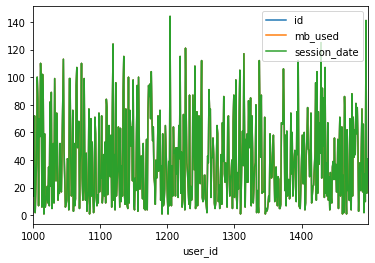

In [45]:
df_internet.query('mb_used == 0').groupby('user_id').count().plot()

Похожая ситуация и с интернет-сессиями. Мне кажется, это могли быть сбои в подключении или попытки выхода в интернет с низким уровнем связи. Сам не раз сталкивался с тем, что интернет проподал и приходилось включать/выключать авиарежим, чтобы все заработало. Учитывая, что такие сессии составляют порядка 13% я бы их не трогал и оставил как есть. На стоимсть они не повлияют, так как мы считаем не количество подключений а трафик и отметать их тоже не вижу смысла. Определяем их как несостоявшиеся сессии по причине сбоя интернета или плохой связи и оставляем в покое.  

## Посчитаем сколько расходуют наши клиенты и сколько нам это приносит денег

### Начнем со звонков

Создадим вспомогательную таблицу для определения тарифа по id клиента

In [46]:
df_id_tariff = df_users.drop(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date'], axis=1).copy()
df_id_tariff.groupby(['tariff']).count()

,user_id
tariff,
smart,351
ultra,149


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя. Для этого выделим отдельный столбец с месяцем и с тарифом, после чего сгруппируем таблицу по этим столбцам

In [47]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

Добавим информацию по тарифу к нашей таблице с данными по звонкам

In [48]:
df_calls = df_calls.merge(df_id_tariff, on='user_id', how='outer').copy()

In [49]:
df_calls_pivot = df_calls.pivot_table(index=['tariff', 'user_id', 'month'],
                     values=['duration'], 
                    aggfunc=['sum', 'count']).copy()
#df_calls_pivot = df_calls_pivot.unstack()
df_calls_pivot

sum    count
                     duration duration
tariff user_id month                  
smart  1001    11.0     430.0       59
               12.0     414.0       63
       1002    6.0      117.0       15
               7.0      214.0       26
               8.0      289.0       42
...                       ...      ...
ultra  1495    8.0       92.0       17
               9.0      813.0      112
               10.0    1030.0      152
               11.0     954.0      129
               12.0    1031.0      155

[3174 rows x 2 columns]

### Теперь посчитаем количество отправленных сообщений по месяцам.

In [50]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

In [51]:
df_messages = df_messages.merge(df_id_tariff, on='user_id'
                               ).copy()

In [52]:
df_messages_pivot = df_messages.pivot_table(index=['tariff', 'user_id', 'month'],
                     values=['message_date'], 
                    aggfunc=['count']).copy()
df_messages_pivot

count
                     message_date
tariff user_id month             
smart  1002    6                4
               7               11
               8               13
               9                4
               10              10
...                           ...
ultra  1495    8               13
               9               82
               10              82
               11              79
               12              84

[2717 rows x 1 columns]

### Теперь объем израсходованного интернет-трафика по месяцам

In [53]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [54]:
 df_internet = df_internet.merge(df_id_tariff, on='user_id', how='outer'
                                ).copy()

In [55]:
df_internet_pivot = df_internet.pivot_table(index=['tariff', 'user_id', 'month'],
                      values=['mb_used'], 
                     aggfunc=['sum'])
df_internet_pivot

sum
                      mb_used
tariff user_id month         
smart  1001    11.0   18452.0
               12.0   14053.0
       1002    6.0    10871.0
               7.0    17601.0
               8.0    20347.0
...                       ...
ultra  1495    8.0     2616.0
               9.0    33105.0
               10.0   29393.0
               11.0   38972.0
               12.0   23450.0

[3203 rows x 1 columns]

А теперь сведем все, чтобы можно было посчитать затраты по тарифу

In [56]:
df_all_pivot = df_messages_pivot.merge(df_internet_pivot, on=['tariff', 'month', 'user_id'], how='outer'
                                      ).copy()
df_all_pivot

count      sum
                     message_date  mb_used
tariff month user_id                      
smart  6     1002             4.0  10871.0
       7     1002            11.0  17601.0
       8     1002            13.0  20347.0
       9     1002             4.0  16712.0
       10    1002            10.0  13905.0
...                           ...      ...
ultra  9     1469             NaN  33725.0
       10    1469             NaN  33416.0
       11    1469             NaN  35533.0
       12    1469             NaN  27786.0
       4     1476             NaN    531.0

[3214 rows x 2 columns]

In [57]:
df_all_pivot = df_calls_pivot.merge(df_all_pivot, on=['tariff', 'user_id', 'month'], how='outer'
                                      ).copy()
df_all_pivot

sum    count                   sum
                     duration duration message_date  mb_used
tariff user_id month                                        
smart  1001    11.0     430.0     59.0          NaN  18452.0
               12.0     414.0     63.0          NaN  14053.0
       1002    6.0      117.0     15.0          4.0  10871.0
               7.0      214.0     26.0         11.0  17601.0
               8.0      289.0     42.0         13.0  20347.0
...                       ...      ...          ...      ...
ultra  1473    9.0        NaN      NaN         19.0  17307.0
               10.0       NaN      NaN         20.0  13703.0
               11.0       NaN      NaN         14.0  21692.0
               12.0       NaN      NaN         20.0  18432.0
       1476    4.0        NaN      NaN          NaN    531.0

[3214 rows x 4 columns]

Теперь у нас есть таблица, разбитая на клиентов и их данными использования услуг по каждому месяцу, остается только выставить каждому счет согласно их тарифному плану, без скрытых подписок и переплат :)

In [58]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [59]:
int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['minutes_included'])

500

Функция будет принимать строку нашей сводной талицы и но основе фильтра расходов каждого клиента мы высчитаем его месячный счет.

In [62]:
def month_bill(row):
    result = 0
    if 'smart' in row.name:
        result += int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['rub_monthly_fee'])
        if row['sum', 'duration'] > int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['minutes_included']):
            result += (row['sum', 'duration'] - int(df_tariffs[df_tariffs['tariff_name'
                        ] == 'smart']['minutes_included'])) * int(df_tariffs[df_tariffs['tariff_name'
                                                                                       ] == 'smart']['rub_per_minute'])
        if row['count', 'message_date'] > int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['messages_included']):
            result += (row['count', 'message_date'] - int(df_tariffs[df_tariffs['tariff_name'
                        ] == 'smart']['messages_included'])) * int(df_tariffs[df_tariffs['tariff_name'
                                                                                        ] == 'smart']['rub_per_minute'])
        if row['sum', 'mb_used'] > int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['mb_per_month_included']):
            result += np.ceil((row['sum', 'mb_used'] - int(df_tariffs[df_tariffs['tariff_name'
                                ] == 'smart']['mb_per_month_included'])) / 1024) * int(df_tariffs[df_tariffs['tariff_name'] == 'smart']['rub_per_gb']) 
    if 'ultra' in row.name:
        result += int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['rub_monthly_fee'])
        if row['sum', 'duration'] > int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['minutes_included']):
            result += (row['sum', 'duration'] - int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['minutes_included'])) * int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['rub_per_minute'])
        if row['count', 'message_date'] > int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['messages_included']):
            result += (row['count', 'message_date'] - int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['messages_included'])) * int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['rub_per_message'])
        if row['sum', 'mb_used'] > int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['mb_per_month_included']):
            result += np.ceil((row['sum', 'mb_used'] - int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['mb_per_month_included'])) / 1024) * int(df_tariffs[df_tariffs['tariff_name'] == 'ultra']['rub_per_gb'])
    return result

In [63]:
df_all_pivot['month_bill'] = df_all_pivot.apply(month_bill, axis=1)

count    3214.000000
mean     1532.592097
std       799.651454
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: month_bill, dtype: float64

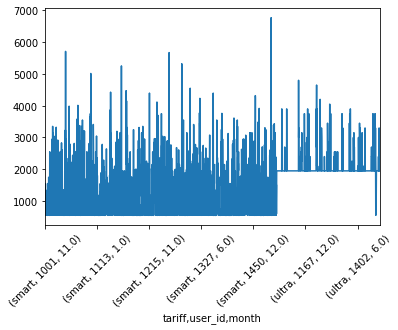

In [64]:
df_all_pivot['month_bill'].plot(rot=45)
df_all_pivot['month_bill'].describe()

Так я общим взглядом оцениваю адекватно ли применена моя функция. Здесь видно какие пики по счетам, как в целом распределены затраты и, например, что по тарифу ультра все платили не менее 1950 руб в месяц, как и должно быть

In [65]:
df_all_pivot

sum    count                   sum month_bill
                     duration duration message_date  mb_used           
tariff user_id month                                                   
smart  1001    11.0     430.0     59.0          NaN  18452.0     1350.0
               12.0     414.0     63.0          NaN  14053.0      550.0
       1002    6.0      117.0     15.0          4.0  10871.0      550.0
               7.0      214.0     26.0         11.0  17601.0     1150.0
               8.0      289.0     42.0         13.0  20347.0     1550.0
...                       ...      ...          ...      ...        ...
ultra  1473    9.0        NaN      NaN         19.0  17307.0     1950.0
               10.0       NaN      NaN         20.0  13703.0     1950.0
               11.0       NaN      NaN         14.0  21692.0     1950.0
               12.0       NaN      NaN         20.0  18432.0     1950.0
       1476    4.0        NaN      NaN          NaN    531.0     1950.0

[3214 rows x 5 columns]

In [66]:
df_all_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (smart, 1001, 11.0) to (ultra, 1476, 4.0)
Data columns (total 5 columns):
(sum, duration)          3174 non-null float64
(count, duration)        3174 non-null float64
(count, message_date)    2717 non-null float64
(sum, mb_used)           3203 non-null float64
(month_bill, )           3214 non-null float64
dtypes: float64(5)
memory usage: 142.3+ KB


При сведении таблиц мы получили пропуски (NaN), которые возникли по причине отсутсвия данных по позициям в тот момент, когда по какой-то из позиций данные есть. Допустим в какой-то из месяцев пользователь не совершал звонки и не выходил в интернет, но отправлял смс или пользовался интернетом и звонил, но не написал ни одну смс-ку - такое вполне реально. Посмотрим на них и просто заполним эти пропуски нулями.

In [67]:
df_all_pivot[df_all_pivot['sum', 'duration'].isna()]

sum    count                   sum month_bill
                     duration duration message_date  mb_used           
tariff user_id month                                                   
smart  1373    6.0        NaN      NaN         48.0  12457.0      550.0
       1489    8.0        NaN      NaN         17.0  11066.0      550.0
               9.0        NaN      NaN         32.0  17232.0      950.0
               10.0       NaN      NaN         21.0  19588.0     1550.0
               11.0       NaN      NaN         20.0  17516.0     1150.0
               12.0       NaN      NaN         35.0  17341.0      950.0
ultra  1091    5.0        NaN      NaN         30.0  10714.0     1950.0
               6.0        NaN      NaN         30.0  10245.0     1950.0
               7.0        NaN      NaN         35.0  16460.0     1950.0
               8.0        NaN      NaN         31.0  12644.0     1950.0
               9.0        NaN      NaN         32.0  16611.0     1950.0
               10.0       NaN      NaN         44.0  15659.0     1950.0
               11.0       NaN      NaN         28.0  11876.0     1950.0
               12.0       NaN      NaN         42.0  13292.0     1950.0
       1106    4.0        NaN      NaN          9.0   2925.0     1950.0
               5.0        NaN      NaN         28.0  16591.0     1950.0
               6.0        NaN      NaN         30.0  20036.0     1950.0
               7.0        NaN      NaN         24.0  21647.0     1950.0
               8.0        NaN      NaN         25.0  19105.0     1950.0
               9.0        NaN      NaN         23.0  21953.0     1950.0
               10.0       NaN      NaN         33.0  14021.0     1950.0
               11.0       NaN      NaN         29.0  21311.0     1950.0
               12.0       NaN      NaN         24.0  18722.0     1950.0
       1231    5.0        NaN      NaN         55.0  10868.0     1950.0
               6.0        NaN      NaN        201.0  27850.0     1950.0
               7.0        NaN      NaN        211.0  27718.0     1950.0
               8.0        NaN      NaN        180.0  32075.0     2250.0
               9.0        NaN      NaN        188.0  33220.0     2400.0
               10.0       NaN      NaN        185.0  31060.0     2100.0
               11.0       NaN      NaN        173.0  27459.0     1950.0
               12.0       NaN      NaN        191.0  32481.0     2250.0
       1328    10.0       NaN      NaN          6.0  22447.0     1950.0
               11.0       NaN      NaN          8.0  35567.0     2700.0
               12.0       NaN      NaN          7.0  39461.0     3300.0
       1473    8.0        NaN      NaN         17.0  12917.0     1950.0
               9.0        NaN      NaN         19.0  17307.0     1950.0
               10.0       NaN      NaN         20.0  13703.0     1950.0
               11.0       NaN      NaN         14.0  21692.0     1950.0
               12.0       NaN      NaN         20.0  18432.0     1950.0
       1476    4.0        NaN      NaN          NaN    531.0     1950.0

In [68]:
df_all_pivot[df_all_pivot['sum', 'mb_used'].isna()]

sum    count                  sum month_bill
                     duration duration message_date mb_used           
tariff user_id month                                                  
smart  1446    8.0       50.0      4.0          1.0     NaN      550.0
ultra  1273    5.0      220.0     24.0         21.0     NaN     1950.0
               6.0      230.0     40.0         38.0     NaN     1950.0
               7.0      253.0     44.0         37.0     NaN     1950.0
               8.0      253.0     53.0         41.0     NaN     1950.0
               9.0      223.0     33.0         32.0     NaN     1950.0
               10.0     315.0     40.0         35.0     NaN     1950.0
               11.0     272.0     45.0         29.0     NaN     1950.0
               12.0     260.0     41.0         39.0     NaN     1950.0
       1377    2.0      179.0     23.0          2.0     NaN     1950.0
       1392    2.0       13.0      2.0          3.0     NaN     1950.0

In [69]:
df_all_pivot[df_all_pivot['count', 'message_date'].isna()]

sum    count                   sum month_bill
                     duration duration message_date  mb_used           
tariff user_id month                                                   
smart  1001    11.0     430.0     59.0          NaN  18452.0     1350.0
               12.0     414.0     63.0          NaN  14053.0      550.0
       1006    2.0       42.0      3.0          NaN   1395.0      550.0
               3.0      286.0     46.0          NaN  17309.0      950.0
               4.0      356.0     47.0          NaN  13954.0      550.0
...                       ...      ...          ...      ...        ...
ultra  1469    9.0      763.0    104.0          NaN  33725.0     2400.0
               10.0     908.0    123.0          NaN  33416.0     2400.0
               11.0     795.0    111.0          NaN  35533.0     2700.0
               12.0     635.0    106.0          NaN  27786.0     1950.0
       1476    4.0        NaN      NaN          NaN    531.0     1950.0

[497 rows x 5 columns]

In [70]:
df_all_pivot['sum', 'duration'] = df_all_pivot['sum', 'duration'].fillna(0)

In [71]:
df_all_pivot['sum', 'mb_used'] = df_all_pivot['sum', 'mb_used'].fillna(0)

In [72]:
df_all_pivot['count', 'message_date'] = df_all_pivot['count', 'message_date'].fillna(0)

In [73]:
df_all_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (smart, 1001, 11.0) to (ultra, 1476, 4.0)
Data columns (total 5 columns):
(sum, duration)          3214 non-null float64
(count, duration)        3174 non-null float64
(count, message_date)    3214 non-null float64
(sum, mb_used)           3214 non-null float64
(month_bill, )           3214 non-null float64
dtypes: float64(5)
memory usage: 142.3+ KB


Получили такую вот сводную таблицу с помесячными выплатами клиентов. Кто-то укалдывается в свой тариф и платит 500 руб, кто-то ни в чем себе не отказывает и платит более 6,5 тыс руб за месяц, но в среднем мы получаем примерно 1500 руб с клиента в месяца - довольно неплохо :) Проверим какой из тарифов увеличивает эту сумму, а какой тянет нас ко дну :)

## Перейдем к анализу

Для начала преобразуем для удоства анализа нашу сводную таблицу

In [74]:
df_all_pivot.columns

MultiIndex([(       'sum',     'duration'),
            (     'count',     'duration'),
            (     'count', 'message_date'),
            (       'sum',      'mb_used'),
            ('month_bill',             '')],
           )

In [75]:
df_all_pivot.head()

sum    count                   sum month_bill
                     duration duration message_date  mb_used           
tariff user_id month                                                   
smart  1001    11.0     430.0     59.0          0.0  18452.0     1350.0
               12.0     414.0     63.0          0.0  14053.0      550.0
       1002    6.0      117.0     15.0          4.0  10871.0      550.0
               7.0      214.0     26.0         11.0  17601.0     1150.0
               8.0      289.0     42.0         13.0  20347.0     1550.0

In [76]:
df_all_pivot = df_all_pivot.drop([("count", "duration")], axis=1)

In [77]:
df_all_pivot = df_all_pivot.droplevel(level=0, axis=1)

In [78]:
df_all_pivot = df_all_pivot.rename(columns={"duration": "call_duration", "message_date": "message_count", "": "month_bill"})

In [79]:
df_all_pivot

call_duration  message_count  mb_used  month_bill
tariff user_id month                                                   
smart  1001    11.0           430.0            0.0  18452.0      1350.0
               12.0           414.0            0.0  14053.0       550.0
       1002    6.0            117.0            4.0  10871.0       550.0
               7.0            214.0           11.0  17601.0      1150.0
               8.0            289.0           13.0  20347.0      1550.0
...                             ...            ...      ...         ...
ultra  1473    9.0              0.0           19.0  17307.0      1950.0
               10.0             0.0           20.0  13703.0      1950.0
               11.0             0.0           14.0  21692.0      1950.0
               12.0             0.0           20.0  18432.0      1950.0
       1476    4.0              0.0            0.0    531.0      1950.0

[3214 rows x 4 columns]

In [80]:
df_smart = df_all_pivot.loc['smart'].reset_index()

In [81]:
df_ultra = df_all_pivot.loc['ultra'].reset_index()

### Начнем с тарифа Смарт

In [82]:
df_smart

,user_id,month,call_duration,message_count,mb_used,month_bill
0,1001,11.0,430.0,0.0,18452.0,1350.0
1,1001,12.0,414.0,0.0,14053.0,550.0
2,1002,6.0,117.0,4.0,10871.0,550.0
3,1002,7.0,214.0,11.0,17601.0,1150.0
4,1002,8.0,289.0,13.0,20347.0,1550.0
...,...,...,...,...,...,...
2224,1489,8.0,0.0,17.0,11066.0,550.0
2225,1489,9.0,0.0,32.0,17232.0,950.0
2226,1489,10.0,0.0,21.0,19588.0,1550.0
2227,1489,11.0,0.0,20.0,17516.0,1150.0


In [83]:
#pip install pandas_profiling

In [84]:
#from pandas_profiling import ProfileReport

In [85]:
#ProfileReport(df_smart, minimal=True)

In [86]:
#help('GridspecLayout')

In [87]:
df_smart['call_duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: call_duration, dtype: float64

In [88]:
df_smart['call_duration'].var()

36219.31578434428

In [89]:
np.var(df_smart['call_duration'])

36203.06665209469

In [90]:
np.sqrt(np.var(df_smart['call_duration']))

190.27103471651876

In [91]:
np.std(df_smart['call_duration'])

190.27103471651876

In [92]:
np.std(df_smart['call_duration'], ddof=1) #правильнее считать ст откл для выборки

190.31372988921288

In [93]:
np.std(df_smart['call_duration']) / df_smart['call_duration'].mean() # коэф вариации или относит стандарт отклонение

0.4552647139024689

Не будем каждый раз счиать стандартное отклонение, так как оно выводиться у нас функицей describe

In [94]:
df_smart['message_count'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_count, dtype: float64

In [95]:
df_smart['message_count'].var()

796.8129584480083

In [96]:
np.std(df_smart['message_count']) / df_smart['message_count'].mean()

0.8453606103086522

In [97]:
df_smart['mb_used'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

In [98]:
df_smart['mb_used'].var()

34545911.12695753

In [99]:
np.std(df_smart['mb_used']) / df_smart['mb_used'].mean()

0.3620796211151959

In [100]:
df_smart['month_bill'].describe()

count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: month_bill, dtype: float64

In [101]:
df_smart['month_bill'].var()

673931.3213632443

In [102]:
#df_smart.columns

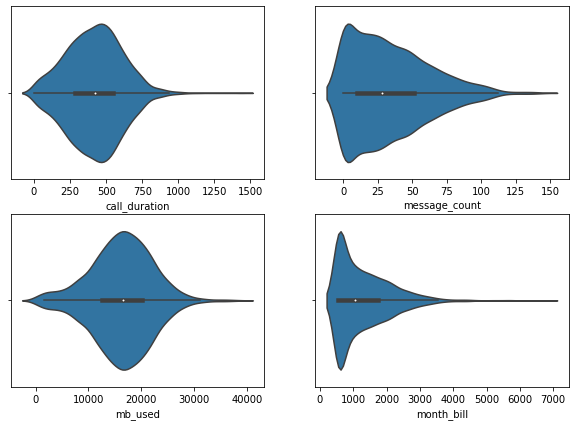

In [103]:
f, ax = plt.subplots(2, 2, figsize=(10, 7))
sns.violinplot(x=df_smart['call_duration'], ax=ax[0][0]);
sns.violinplot(x=df_smart['message_count'], ax=ax[0][1]);
sns.violinplot(x=df_smart['mb_used'], ax=ax[1][0]);
sns.violinplot(x=df_smart['month_bill'], ax=ax[1][1]);

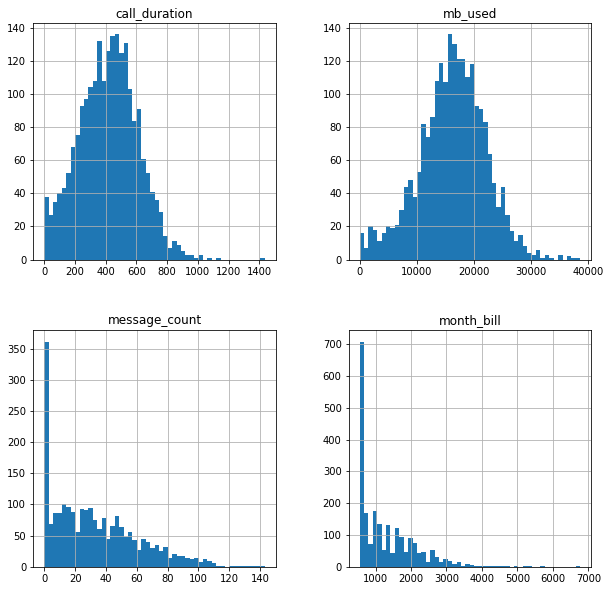

In [104]:
df_smart.hist(bins=50, column=['call_duration', 'message_count', 'mb_used', 'month_bill'], figsize=(10, 10));

Что мы можем сказать по пользователям тарифа Смарт?  
По звонкам распределение стремиться к нормальному и хотя в среднем они разговаривают около 420 мин в месяц, что чуть меньше лимита, за счет распределения получается что почти половина выходит за этот лимит и переплачивает. Стандартное отклонение составляет 189, что довольно сконцентрировано распределяет продолжительность суммарных звонков в месяц, что мы и видим на гистограмме. У нас образовывается довольно длинный хвост, что видно на нашем "скрипичном" графике, так как есть отдельные пользователи, которые наговаривали почти сутки за месяц.   
Похожую ситуацию мы наблюдаем с интернетом, но здесь поменьше разброс, что показывает нам меньшее относительное стандартное отклонение и графики. В целом распределение визуально ближе к нормальному. Также мы видим чуть большее скопление в меньших объемах трафика и совсем небольшой хвост в больших расходах траифка. Можно сказать что гистограма перекошена влево. Зато в случае с интернетом среднее и медиана чуть больше, чем лимит по тарифу, за счет чего переплаты за звонки и интернет могут быть схожи.   
С смс-ками мы видим  другую ситуацию - здесь у нас большой разброс, очень длинный хвост, зато среднее и медиана сравнимо меньше лимита по тарифу (38 и 34 против 50). Распределение меньше всего напоминает нормальное из этих трех и заметен явный перекос вправо.  
Видится что лимиты установлены очень грамотно, так что линия с лимитами будет отсектаь примерно половину площади графика использованного объема...  Что мы можем видеть и на гистограме и графике по месячному счету.

### Постичаем все то же самое для тарифа Ultra

In [105]:
df_ultra

,user_id,month,call_duration,message_count,mb_used,month_bill
0,1000,5.0,159.0,22.0,2256.0,1950.0
1,1000,6.0,172.0,60.0,23257.0,1950.0
2,1000,7.0,340.0,75.0,14016.0,1950.0
3,1000,8.0,408.0,81.0,14070.0,1950.0
4,1000,9.0,466.0,57.0,14581.0,1950.0
...,...,...,...,...,...,...
980,1473,9.0,0.0,19.0,17307.0,1950.0
981,1473,10.0,0.0,20.0,13703.0,1950.0
982,1473,11.0,0.0,14.0,21692.0,1950.0
983,1473,12.0,0.0,20.0,18432.0,1950.0


In [106]:
df_ultra['call_duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: call_duration, dtype: float64

In [107]:
df_ultra['call_duration'].var()

100873.63339730098

In [108]:
np.std(df_ultra['call_duration']) / df_ultra['call_duration'].mean()

0.6027929361596823

In [109]:
df_ultra['message_count'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_count, dtype: float64

In [110]:
df_ultra['message_count'].var()

2285.2661425446736

In [111]:
np.std(df_ultra['message_count']) / df_ultra['message_count'].mean()

0.9679263351008799

In [112]:
df_ultra['mb_used'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

In [113]:
df_ultra['mb_used'].var()

101935621.04821923

In [114]:
np.std(df_ultra['mb_used']) / df_ultra['mb_used'].mean()

0.5178448125714632

In [115]:
df_ultra['month_bill'].describe()

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: month_bill, dtype: float64

In [116]:
df_ultra['month_bill'].var()

143491.24055961374

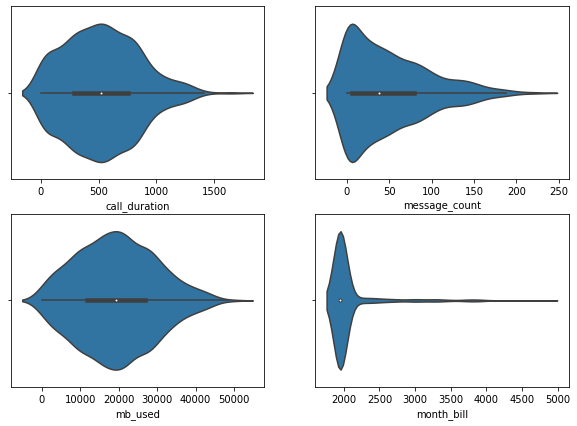

In [117]:
f, ax = plt.subplots(2, 2, figsize=(10, 7))
#sns.set_theme(style="whitegrid")
sns.violinplot(x=df_ultra['call_duration'], ax=ax[0][0]);
sns.violinplot(x=df_ultra['message_count'], ax=ax[0][1]);
sns.violinplot(x=df_ultra['mb_used'], ax=ax[1][0]);
sns.violinplot(x=df_ultra['month_bill'], ax=ax[1][1]);

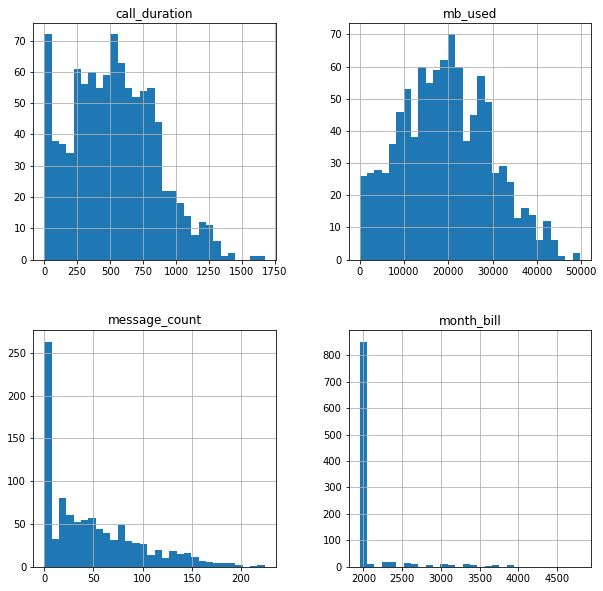

In [118]:
df_ultra.hist(bins=30, column=['call_duration', 'message_count', 'mb_used', 'month_bill'], figsize=(10, 10));

Отобразим для наглядности сравнения графики по обоим тарифам совместно

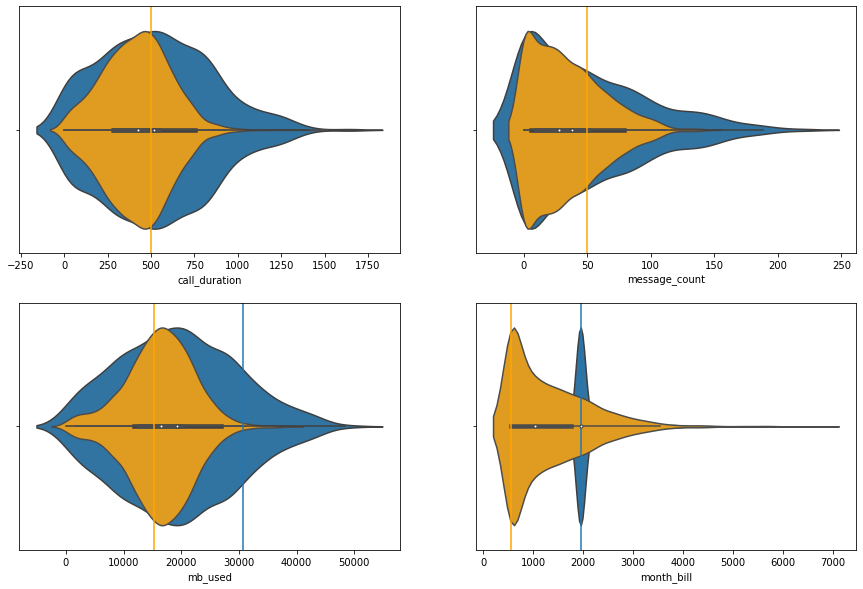

In [119]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x=df_ultra['call_duration'], ax=ax[0][0]);
sns.violinplot(x=df_ultra['message_count'], ax=ax[0][1]);
sns.violinplot(x=df_ultra['mb_used'], ax=ax[1][0]);
sns.violinplot(x=df_ultra['month_bill'], ax=ax[1][1]);
sns.violinplot(x=df_smart['call_duration'], ax=ax[0][0], color='orange');
sns.violinplot(x=df_smart['message_count'], ax=ax[0][1], color='orange');
sns.violinplot(x=df_smart['mb_used'], ax=ax[1][0], color='orange');
sns.violinplot(x=df_smart['month_bill'], ax=ax[1][1], color='orange');
ax[0][0].axvline(x = 500, color='orange');
ax[0][1].axvline(x = 50, color='orange');
ax[1][0].axvline(x = 15360, color='orange');
ax[1][0].axvline(x = 30720);
ax[1][1].axvline(x = 550, color='orange');
ax[1][1].axvline(x = 1950);
#ax[1][1].set_alpha(0.1) не могу никак прозрачность задать... 

In [120]:
#sns.histplot(data=df_ultra, x="call_duration", bins=30, hue="species") не могу почему-то такую гистограмму через seaborn построить...

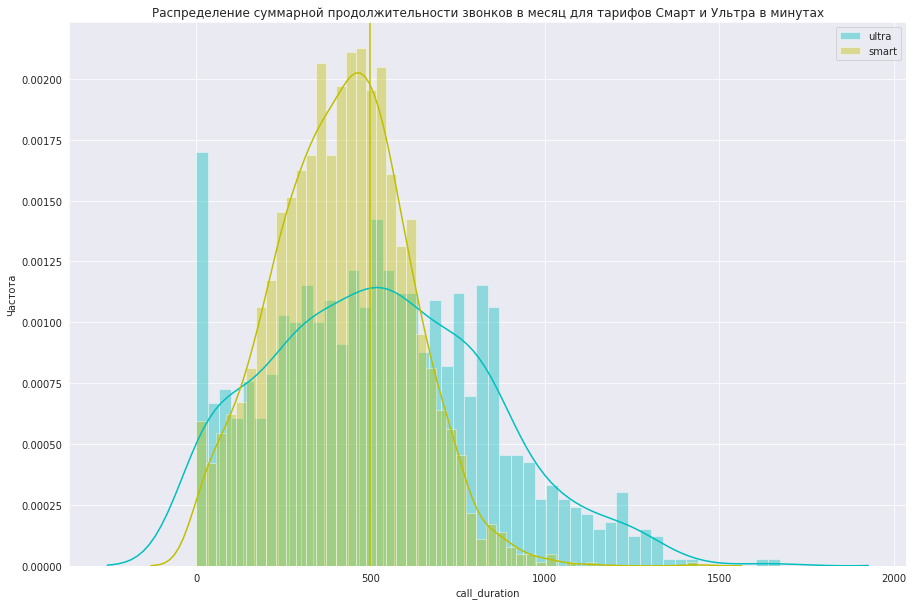

In [121]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10));
sns.distplot(df_ultra['call_duration'], bins=50, color="c", label='ultra');
sns.distplot(df_smart['call_duration'], bins=50, color="y", label='smart');
plt.legend();
plt.axvline(x = 500, color='y');
plt.ylabel('Частота')
plt.title('Распределение суммарной продолжительности звонков в месяц для тарифов Смарт и Ультра в минутах');

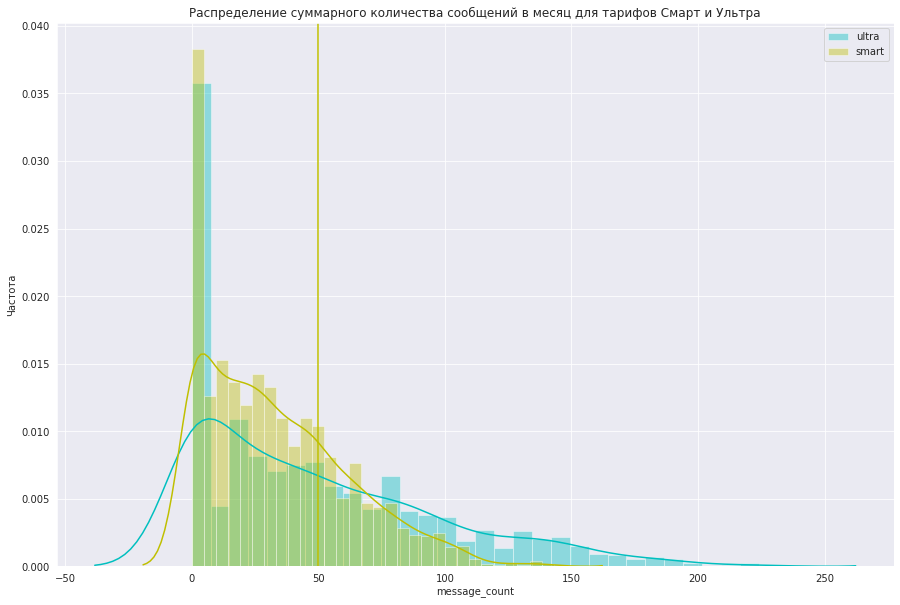

In [122]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10));
sns.distplot(df_ultra['message_count'], bins=30, color="c", label='ultra');
sns.distplot(df_smart['message_count'], bins=30, color="y", label='smart');
plt.legend();
plt.axvline(x = 50, color='y');
plt.ylabel('Частота')
plt.title('Распределение суммарного количества сообщений в месяц для тарифов Смарт и Ультра');

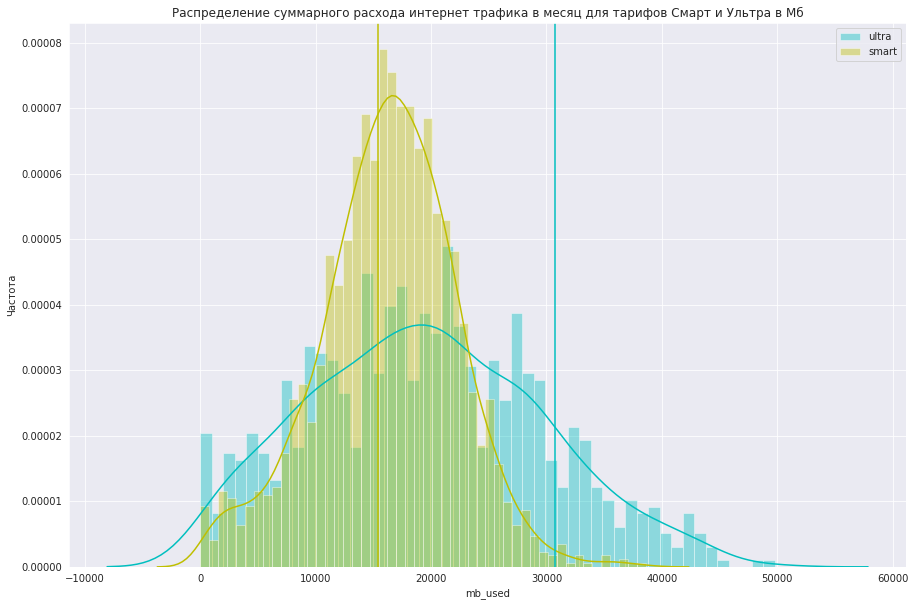

In [123]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10));
sns.distplot(df_ultra['mb_used'], bins=50, color="c", label='ultra');
sns.distplot(df_smart['mb_used'], bins=50, color="y", label='smart');
plt.legend();
plt.axvline(x = 30720, color='c');
plt.axvline(x = 15360, color='y');
plt.ylabel('Частота')
plt.title('Распределение суммарного расхода интернет трафика в месяц для тарифов Смарт и Ультра в Мб');

Интересно, что пользователи с тарифом Ультра разговаривают в среднем не намного больше пользователей с тарифом смарт, хотя у них лимит больше в 6 раз! Вообще никто даже к нему не приблизился, что довольно странно... Видимо этот лимит был определен как в два раза превышающий максимальные разговоры, чтобы произвести Вау-эффект на потенциальных пользователей? Надо посмотреть сколько я наговариваю в месяц со своими селекторами и совещаниями... :) В этот раз стандартное отклонение больше, чем на предыдущем тарифе, но мы видим что распределено это все равномерно, просто пользователи свободнее относятся к продолжительности разговора и нет ярковыраженного пика.  
Снова примерно схожую ситуацию мы наблюдаем с интернетом, хотя здесь уже заметное количество расходов перевалило за лимит. 
В целом мы наблюдаем, что отдаленные лимиты делают наши распределения более равномерными и симметричными, хотя смс по-прежнему более скошенна вправо, несмотря на дальность лимита по тарифу, который кажется абсолютно недостежимым.   
Переплаты по тарифу ультра гораздо реже в сравнении с тарифом смарт.  
Вообще мы видим как отсутсвие рамок как бы растягивает наше среднее, делая всех уникально равномерными... Об этом можно было бы написать целую книгу... :)    


## Проверка гипотез

Для того чтобы сравнить выручку пользователей по тарифу нам не достаточно просто сравнить средние показатели. Куда правильнее и точнее будет оценить насколько вероятно то, что наше утверждение верно. Проведение корректного теста поможет нам уверенее утверждать, являются ли отличия случайными или разницу достаточной. Для этого нам надо выдвинуть гипотезу и проверить её сбыточность. Сформуируем нашу нулевую гипотезу как "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны" или "Средние двух совокупностей (выручки  пользователей тарифов «Ультра» и «Смарт») равны между собой". Тогда альтернативная гипотеза будет звучать как "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны". Соответственно если при проверке нулевой гипотезы мы признаем её нежизнеспособной, то, уже сравнив средние показатели по выручке на обоих тарифах, мы сможем выяснить какой из них приносит больше денег, что нам крайне интересно. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), как нас учили :) Это статисттически тест используемый с распределением Стьюдента (Уильяма Госсета) для сравнения равенства двух генеральных совокупностей.

Критический уровень статистической значимости зададим равный 0,05

In [124]:
alpha = 0.05

In [125]:
results1 = st.ttest_ind(df_smart['month_bill'], df_ultra['month_bill'])# equal_var = True, совокупности схожи по параметарам

results1.pvalue

2.9776448000521676e-158

In [126]:
results1.pvalue < alpha

True

Выходит что наша гипотеза слишком маловероятна, чтобы признать её действительной, поэтому мы её не принимаем и будем считать, что "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны"

In [127]:
df_smart['month_bill'].mean()

1294.6393001345896

In [128]:
df_ultra['month_bill'].mean()

2071.0659898477156

In [129]:
df_ultra['month_bill'].mean() - df_smart['month_bill'].mean()

776.426689713126

Тариф Ультра в среднем приносит почти в два раза больше прибыли с пользователя в месяц и эта закономерность не случайна. Хотя и стоимость тарифа дороже в 4 раза. Конечно, стоит понимать, что основная часть пользователей просто не согласятся на такой тариф, но если нас интересует вопрос какой тариф приности больше денег для компании в среднем в месяц для каждого пользователя с учетом всех затрат сверх тарифа, то получается ответ - это тариф Ультра.

Было бы интересно взглянуть сколько из нашей выборки суммарно принес один и другой тариф за 2018 год.

In [130]:
df_smart['month_bill'].sum()

2885751.0

In [131]:
df_ultra['month_bill'].sum()

2040000.0

Вот так мы видим, что удельный доход с пользователся в месяц выше у тарифа Ультра, но суммарно, так как пользователей тарифа Смарт больше, с него мы и получаем больше. Возможно, на данный тариф клентов привлечь проще и поэтому надо рекламную кампанию выстраивать по этому принципу...

### Москва докажет

Посмотрим отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.  
Для этого переименуем все города, кроме Москвы в Другой и разделем сводную таблицу по этому принципу на две.

In [132]:
df_all_pivot

call_duration  message_count  mb_used  month_bill
tariff user_id month                                                   
smart  1001    11.0           430.0            0.0  18452.0      1350.0
               12.0           414.0            0.0  14053.0       550.0
       1002    6.0            117.0            4.0  10871.0       550.0
               7.0            214.0           11.0  17601.0      1150.0
               8.0            289.0           13.0  20347.0      1550.0
...                             ...            ...      ...         ...
ultra  1473    9.0              0.0           19.0  17307.0      1950.0
               10.0             0.0           20.0  13703.0      1950.0
               11.0             0.0           14.0  21692.0      1950.0
               12.0             0.0           20.0  18432.0      1950.0
       1476    4.0              0.0            0.0    531.0      1950.0

[3214 rows x 4 columns]

In [133]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [134]:
df_id_city = df_users.drop(['age', 'churn_date', 'tariff', 'first_name', 'last_name', 'reg_date'], axis=1).copy()
df_id_city['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [135]:
df_id_city['city'] = df_id_city['city'].where((df_id_city['city'] == 'Москва'), 'Другой')

In [136]:
df_id_city

,user_id,city
0,1000,Другой
1,1001,Москва
2,1002,Другой
3,1003,Москва
4,1004,Другой
...,...,...
495,1495,Другой
496,1496,Другой
497,1497,Другой
498,1498,Другой


In [137]:
df_calls = df_calls.merge(df_id_tariff, on='user_id', how='outer').copy()

In [138]:
df_all_pivot_city = df_all_pivot.merge(df_id_city, on='user_id', how='outer').copy()

In [139]:
df_all_pivot_city.groupby(by='city').count()

,user_id,call_duration,message_count,mb_used,month_bill
city,,,,,
Другой,2605,2603,2603,2603,2603
Москва,611,611,611,611,611


In [140]:
df_moscow = df_all_pivot_city[df_all_pivot_city['city'] == 'Москва'].copy()

In [141]:
df_russia = df_all_pivot_city[df_all_pivot_city['city'] == 'Другой'].dropna().copy()

Теперь применим тот же метод, который мы использовали ранее, только теперь для наших новых совокупностей по городам. Нулевая гипотеза будет звучать аналогично "Средняя выручка пользователей из Москва и пользователей из других городов равны". Критический уровень статистической значимости оставим прежним.

Для начала произведем проверку дисперсий выборок, чтобы понять с каким параметором (equal_var) использовать метод проверки.

In [142]:
df_moscow['month_bill'].var()

566183.0292184273

In [143]:
df_russia['month_bill'].var()

656766.5955122437

In [144]:
df_moscow['month_bill'].describe()

count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: month_bill, dtype: float64

In [145]:
df_russia['month_bill'].describe()

count    2603.000000
mean     1528.316942
std       810.411374
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: month_bill, dtype: float64

Дисперсии и остальные параметры наших выборок схожи, поэтомому примем equal_var = True, прописывать который не обязательно, так как он установлен по умолчанию

In [146]:
results2 = st.ttest_ind(df_moscow['month_bill'], df_russia['month_bill'])

results2.pvalue

0.531666503831252

In [147]:
results2.pvalue < alpha

False

В этот раз мы видим, что наша нулевая гипотеза укалдывается в рамки заданной нами вероятности и поэтому мы её принимаем. То есть средняя выручка от пользвателей не зависит от города в котором они находятся.

In [148]:
#df_moscow['month_bill'].describe()

In [149]:
#df_russia['month_bill'].describe()

In [150]:
df_moscow['month_bill'].mean() - df_russia['month_bill'].mean()

22.488295325863874

Как мы и видим, различия в прибыли по Москве и остальным городам довольна незначительна, что, с учетом проверки нашей гипотезы с использованием t-теста, мы можем уже более уверенно утверждать.

## Общий вывод

Мы проанализировали поведение 500 пользователей двух тарифов Смарт и Ультра нашей компании «Мегалайн» за 2018 год. Разбив пользователей по тарифам и сгруппировав их данные по месяцам мы посмотрели на показатели использования услуг на звонки, отправку сообщений и использование интернета. Можно сказать, что суммарное использование трафика на звонки и интернет у пользователей тарифа Смарт более сконцентрировано к их лимитному значению, однако за счет симметричности распределения, значительный объем выходит за рамки лимита. То есть заметно стремление пользователей к лимиту, однако все равно они его превышают. Возможно, для повышения прибыли компании имеет смысл повысить тарифы на расходы сверх лимита, чтобы попробовать догнать удельную прибыльность с тарифа Ультра.   
У пользователей тарифа Ультра благодаря практически отсутствию лимитов по звонкам наблюдается более растянутое распределение со схожим медианным значение как и у тарифа Смарт в районе 500 минут. То есть разговаривают пользователи примерно одинаково, однако у пользователей Ультра более равномерно распределена суммарная продолжительность. Также примерно одинаково пользуются и интернетом пользователи обоих тарифов, но здесь уже значимое количество выходит за лимит, однако, наблюдая схожую тенденцию как и по звонкам, пользователей Ультра это сильно не беспокоит и они к лимиту «не тянутся». По смс мы наблюдаем незначительное отличие в среднем значении в обоих тарифах (около 35 у Смарт при лимите в 50 и около 50 в Ультра при практически отсутствующем лимите).  И в обоих распределениях мы наблюдаем большой хвост и перекос распределений вправо. Возможно, что большинство обходится небольшим количеством смс в месяц, но за счет пользователей которые не используют мессенджеры или затевают затянутые переписки, мы получаем такое вытяжение. 
Для ответа на основной поставленный вопрос мы посчитали траты за месяц для каждого пользователя, разбили данные по тарифам и применили метод scipy.stats.ttest_ind  - статисттически тест используемый с распределением Стьюдента (Уильяма Госсета) для сравнения равенства двух генеральных совокупностей. И выяснили что вероятность совпадения средней выручки с пользователей с разными тарифами слишком маловероятна, то есть отличается. Далее, сравнив их средние мы пришли к выводу, что пользователь тарифа Ультра нам приносят удельно больше денег, но суммарно мы получаем из данной выборки больше с тарифа Смарт. Однако, отвечая на поставленную задачу, я бы предложил сфокусироваться на тарифе Ультра, акцентирую на крайне высокие лимиты по звонкам и смс, которые трудно превысить и рекомендовал бы повысить плату за перерасход лимита на тарифе Смарт. 
Произведя то же самое сравнение, только не для разных тарифов, а для различия по городам -Москва/Не Москва, мы пришли к выводу, что, несмотря на различия среднего, это отклонение маловероятно и мы сложившееся различия признаем случайно возникшем, то есть различия по прибыли от принадлежности пользователей к столице отсутствуют.  
Кратко общий вывод:  
Тариф Ультра прибыльней, от города прибыль не зависит.